# Homework 2 Rosini Micol

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Utils cell

# Particle perspective

def multipl_avg_time_calculator(G,o,d,num_particles, Q, w_star):
    
    nodes = list(G.nodes())
    origin = nodes.index(o)
    destination = nodes.index(d)

    particles = list(np.arange(num_particles))# All the particles
    possible_nodes = np.arange(len(nodes)) # All nodes expressed in numbers
    
    all_times = [] # All the different return-time or arrival time
    total_time = 0 # Total time of the simulation
     
    pos=[origin]*num_particles # Current position of the particles
         
    while len(particles) > 0:
            
        t_next = -np.log(np.random.rand())/(len(particles)*w_star)
        particle = np.random.choice(particles) # Particle chosen

        probabilityindex = pos[particle] # Node in which the particle is
        new_pos = np.random.choice(possible_nodes, p=Q[probabilityindex,:])
        pos[particle] = new_pos # Node which the particle move to
        total_time += t_next

        if new_pos == destination:
            particles.remove(particle)
            all_times.append(total_time)

    return(sum(all_times)/len(all_times)), all_times


def average_time_calculator(G,o,d,w_star,Q, num_simulations):
    
    nodes = list(G.nodes())
    o = nodes.index(o) # Origin
    d = nodes.index(d) # Destination
    
    returned_times = [] # Returned_times will store the different time instants at which the particle returns in the starting node
    
    for simulation in range(num_simulations):
        pos = []
        pos.append(o) # We start from node 'origin'
        transition_times = 0 # Simulation time
        t_next = -np.log(np.random.rand())/w_star
            
        i = 0
        returned = False
        while not returned:
            
            i += 1
            pos.append(np.random.choice(nstates, p=Q[pos[i-1],:]))
            transition_times += t_next
            if pos[i] == d : # Arrived at destination
                returned_times.append(transition_times)
                if simulation == num_simulations/2:
                    pos_j = pos[1:]
                    pos_i = pos[:-1]
                    edges_visited = [(nodes[i],nodes[j]) for i,j in zip(pos_i,pos_j)]
                returned = True
            t_next = -np.log(np.random.rand())/w_star
            
    return sum(returned_times)/ len(returned_times), edges_visited 
    
def avg_particles_in_nodes_calculator(G,o,num_particles,sim_time, Q, w_star):
    
    nodes = list(G.nodes())
    origin = nodes.index(o)
    
    particles = list(np.arange(num_particles))# All the particles
    possible_nodes = np.arange(len(nodes)) # All nodes expressed in numbers
    
    total_time = 0 # Total time of the simulation
     
    pos =[origin]*num_particles # Current position of the particles
    nop = np.zeros(len(nodes)) # Number of particles for each node
    nop[origin] = num_particles # The simulation starts in origin with #particles = num_particles 
    tot_nop =[]
    tot_nop.append(nop)
    tot_times = []
    tot_times.append(total_time)
    
    while total_time <= sim_time:
            
        t_next = -np.log(np.random.rand())/(len(particles)*w_star)
        probability_vector = nop/100 # It sum up to one 
        node_chosen = np.random.choice(possible_nodes, p=probability_vector)
        
        new_pos = np.random.choice(possible_nodes, p=Q[node_chosen,:])
        nop[node_chosen] -= 1 # Node_chosen loses a particle
        nop[new_pos]+= 1 # Node chosen wins a particle
        total_time += t_next
        tot_nop.append(list(nop))
        tot_times.append(total_time)
    dict_of_nop = {}
    for idx,node in enumerate(nodes):
        dict_of_nop[node] =int( nop[idx])
    return dict_of_nop,nop,tot_nop, tot_times

## Exercise 2

Consider theh graph in the figure above with weights according to :

<div class="math">
    \[\begin{array}{1}& o && a && b && c && d\end{array}\\
        %\begin{array}{1} & o && a && b && c & d\end{array}\\
        W = 
        \begin{pmatrix}
         0 & 2/5 & 1/5 & 0 & 0 \\
         0 & 0 & 3/4 & 1/4 & 0 \\
         1/2 & 0 & 0 & 1/2 & 0 \\
         0 & 0 & 1/3 & 0 & 2/3 \\
         0 & 1/3 & 0 & 1/3 & 0 
        \end{pmatrix}
        \begin{array}{1}
         o \\ a \\ b \\ c \\ d
        \end{array}
      \] 
</div>

Text(0.5, 1.0, 'Graph of the exercise')

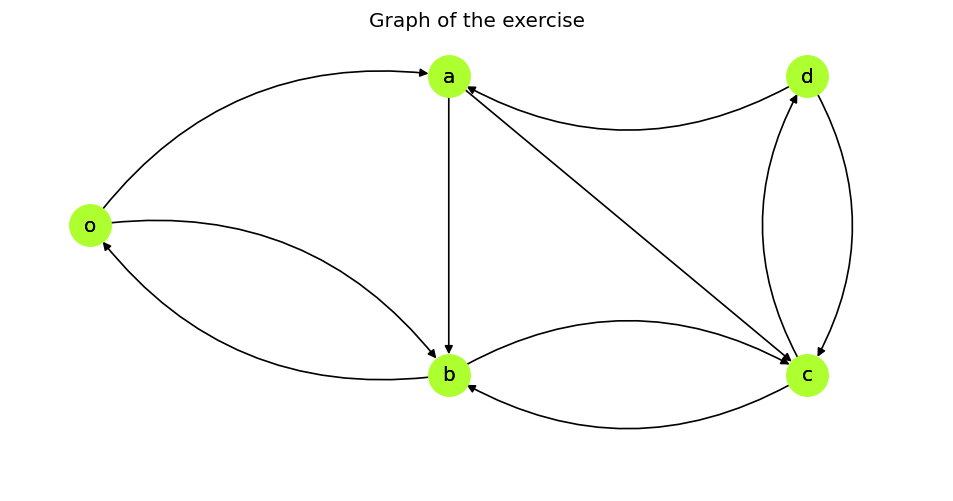

In [3]:
# Script to draw the graph of the exercise

fig, ax = plt.subplots(figsize = (10,5), dpi=120) 


nodes = ['o', 'a', 'b', 'c', 'd']
positions = [(0, 0.5), (0.5, 1), (0.5, 0), (1, 0), (1, 1)]
edges = [('o', 'a'), ('o', 'b'), ('b', 'o'), ('a', 'b'), ('a', 'c'),('b','c'),('c','b'),('d','a'),('d','c'),('c','d')]


G = nx.DiGraph()
G.add_edges_from(edges)
for index, name in enumerate(nodes):
    G.add_node(name, pos=positions[index])
    

layout = dict((n, G.nodes[n]["pos"]) for n in G.nodes())

straight_edges = [('a','b'), ('a','c')]
curved_edges = list(set(G.edges()) - set(straight_edges))

arc_rad = -0.3

nx.draw(G, pos=layout, with_labels=True, node_size=600, node_color ='greenyellow', edgelist = straight_edges)
nx.draw(G, pos=layout, with_labels=True, node_size=600, node_color ='greenyellow', edgelist = curved_edges,  connectionstyle=f'arc3, rad = {arc_rad}')





plt.savefig('fig/graph9.png')
ax.set_title("Graph of the exercise")

Consider many particles moving around in the network in continuous time. For each of the particles in the network the time it will stay in a node is exponentially distributed, and on average it will stay $1/w_i$ time-units in a node $i$ before moving to one of its outneighbors. The next node it will visit is based on the probability matrix $P = diag(\omega)^{-1}\Lambda$, where $\omega= \Lambda\mathbf{1}$.

The simulation will be from 2 different perspective: the ***particle perspective***, i.e. “follow the particle”, and the ***node perspective***, i.e. “observe from the node”.

### a) Node perspective:

- If 100 particles all start in node a, what is the average time for a particle to return to node a?
- How does this compare to the answer in Exercise 1, why?

In [4]:
# Settings of the graph

W = [[0, 2/5, 1/5, 0, 0],
          [0, 0, 3/4, 1/4, 0],
          [1/2, 0, 0, 1/2, 0],
          [0, 0, 1/3, 0, 2/3],
          [0, 1/3, 0, 1/3, 0]]


w = np.sum(W, axis=1)
w_star = np.max(w)


Q = W/w_star 
Q = Q + np.diag(np.ones(len(w))-np.sum(Q, axis = 1))

# dominant eigevector
values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
nstates = len(pi_bar)

D = np.diag(w)

# Transition probability matrix
P_bar = W /w_star
P_bar -= np.diag(P_bar)
P_bar += np.diag(1 - w/w_star*(1-np.diag(P_bar)))

***Solution***

In [5]:
multiple_avg_time, _ = multipl_avg_time_calculator(G,'a','a',100, Q, w_star)
print('The average time for 100 particles to return to node a is :', multiple_avg_time)

The average time for 100 particles to return to node a is : 6.221062415635311


As the particles do not influence each other while moving, they take on average the average time taken by only one particle to return to the origin.
Indeed, we can demonstrate this  with the following function  that compute the average return-time `average_time_calculator`.

In [6]:
avg_return_time, _= average_time_calculator(G, 'a' , 'a' , w_star, Q,  10000)
print('The average time for a single particle to return in node a:', avg_return_time)

The average time for a single particle to return in node a: 6.754628484757182


The 2 results are really similar.
The graph above will show the different return-times for each particle

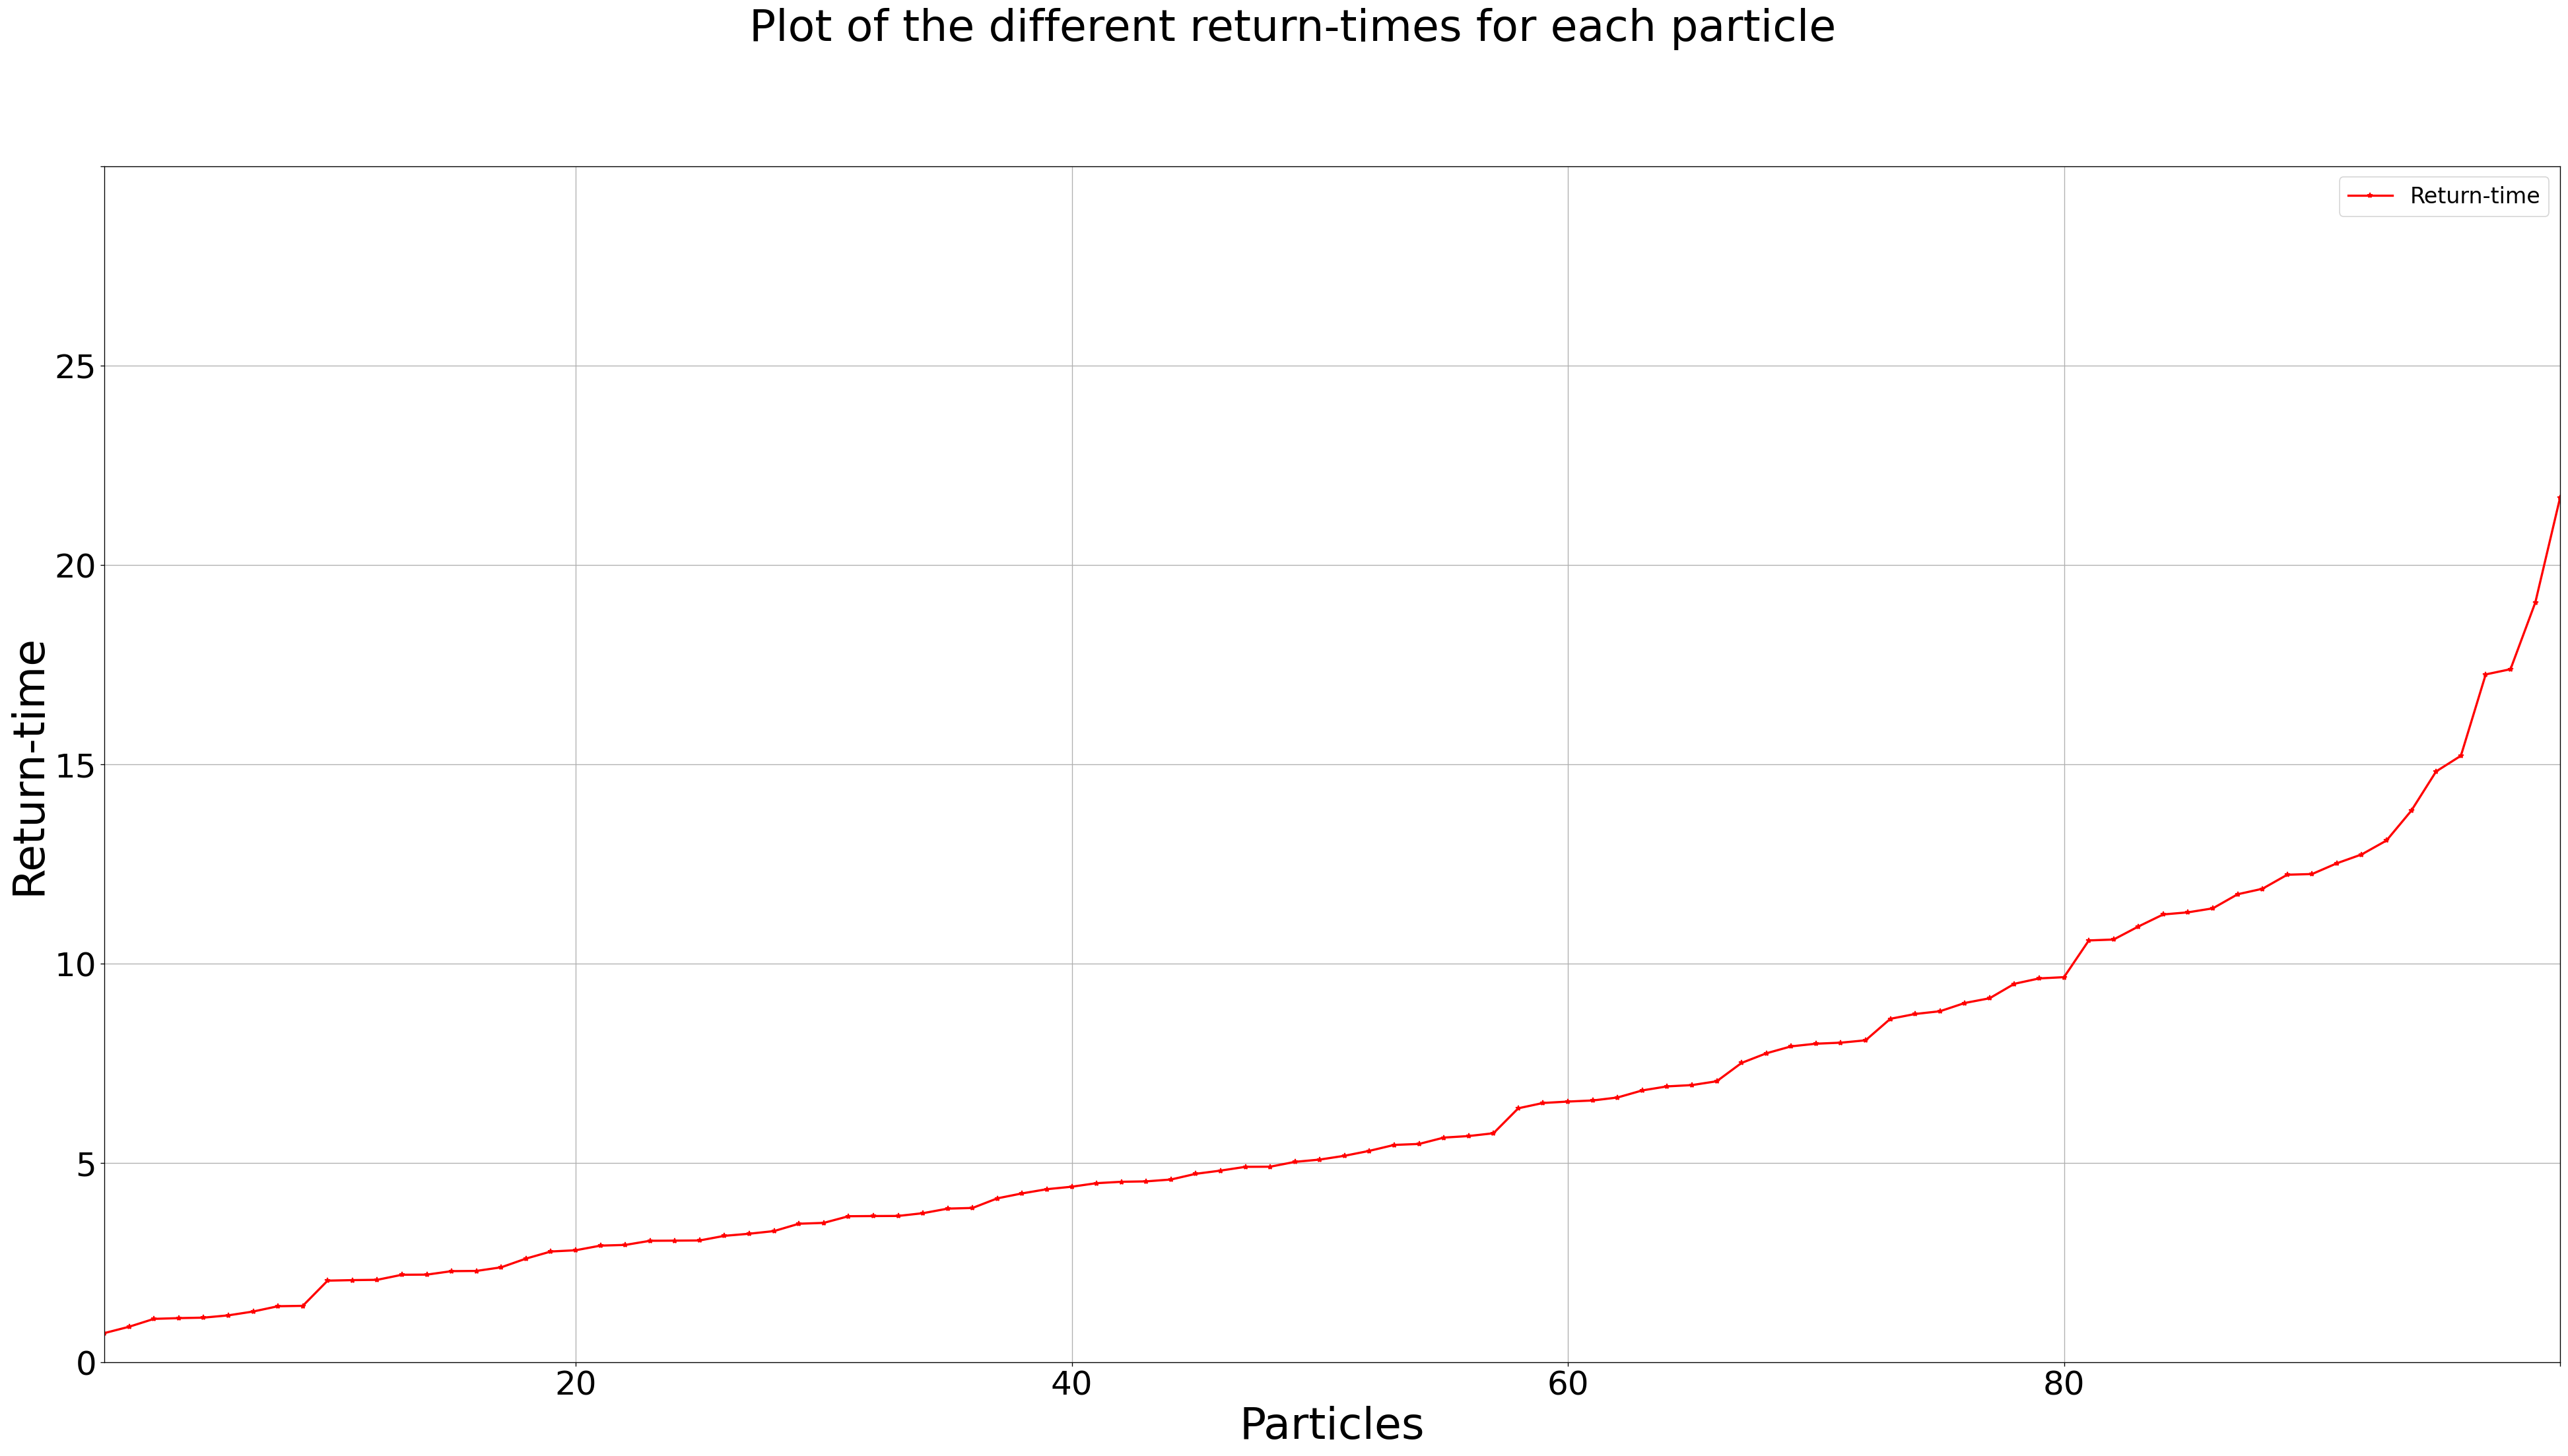

In [7]:
fig,ax = plt.subplots(figsize=(40,20),dpi=120)

_, all_times = multipl_avg_time_calculator(G,'a','a',100, Q, w_star)
ax.plot(np.linspace(1, 100, 100), all_times, color ='red', marker='*',linewidth=2, markersize=5, label = 'Return-time')



ax.set_xlabel("Particles", fontsize = 40)
ax.set_xlim(left = 1.0, right = 100)

ax.set_ylabel("Return-time", fontsize = 40)
ax.set_ylim(bottom = 0.0, top = 30)

ax.set_yticklabels(np.arange(0, 30, 5),fontsize= 30)
ax.set_xticklabels(np.arange(0, 99, 20),fontsize= 30)




ax.legend(fontsize = 20)
ax.grid()


plt.savefig('fig/graph10.png')
fig.suptitle('Plot of the different return-times for each particle', fontsize=40)


plt.show()

### b) Particle perspective:

- If 100 particles start in node $o$, and the system is simulated for 60 time units, what is the average number of particles in the different nodes at the end of the simulation?

- Illustrate the simulation above with a plot showing the number of particles in each node during the simulation time.

- Compare the simulation result in the first point above with the stationary distribution of the continuous-time random walk followed by the single particles.

***Solution***

In [8]:
particles_in_nodes,nop,tot_nop, tot_times = avg_particles_in_nodes_calculator(G,'a',100,60, Q, w_star)
print('Each node at the end of the simulation has the following number of particles',particles_in_nodes)

Each node at the end of the simulation has the following number of particles {'o': 20, 'a': 15, 'b': 21, 'c': 22, 'd': 22}


Text(0.5, 1.0, 'Graph with nodes proportionate to the number of particles inside them')

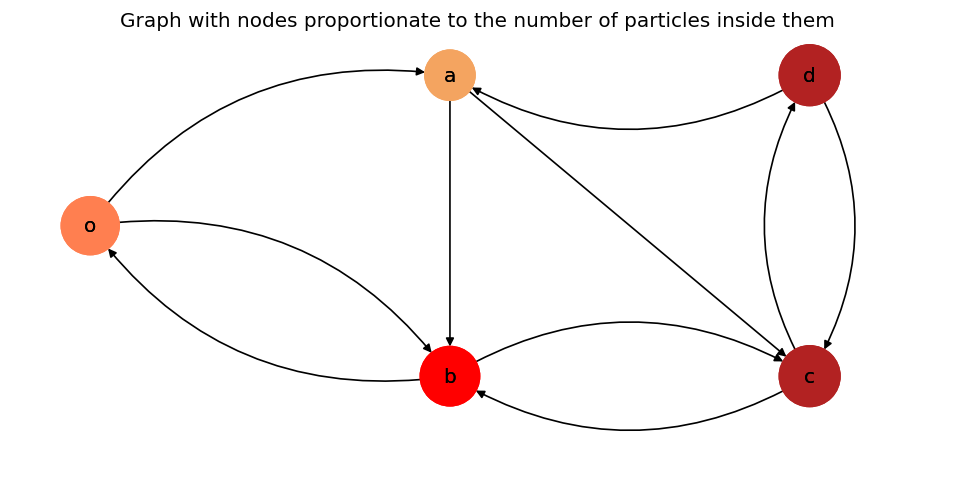

In [9]:
fig, ax = plt.subplots(figsize = (10,5), dpi=120)

nop_ordered = sorted(nop)
node_color = ['sandybrown' if node == nop_ordered[0] 
              else 'coral' if   node == nop_ordered[1] 
              else 'red' if  node == nop_ordered[2]
              else 'firebrick' if node == nop_ordered[3] 
              else 'darkred'  for node in nop]

node_size = [el * 60 for el in nop]
    
nx.draw(G, pos=layout, with_labels=True, node_size=node_size,
        node_color =node_color, edgelist = straight_edges)
nx.draw(G, pos=layout, with_labels=True, node_size=node_size,
        node_color =node_color, edgelist = curved_edges,  connectionstyle=f'arc3, rad = {arc_rad}')




plt.savefig('fig/graph11.png')
ax.set_title("Graph with nodes proportionate to the number of particles inside them")

The following plot shows the number of particles in each node during the simulation time:

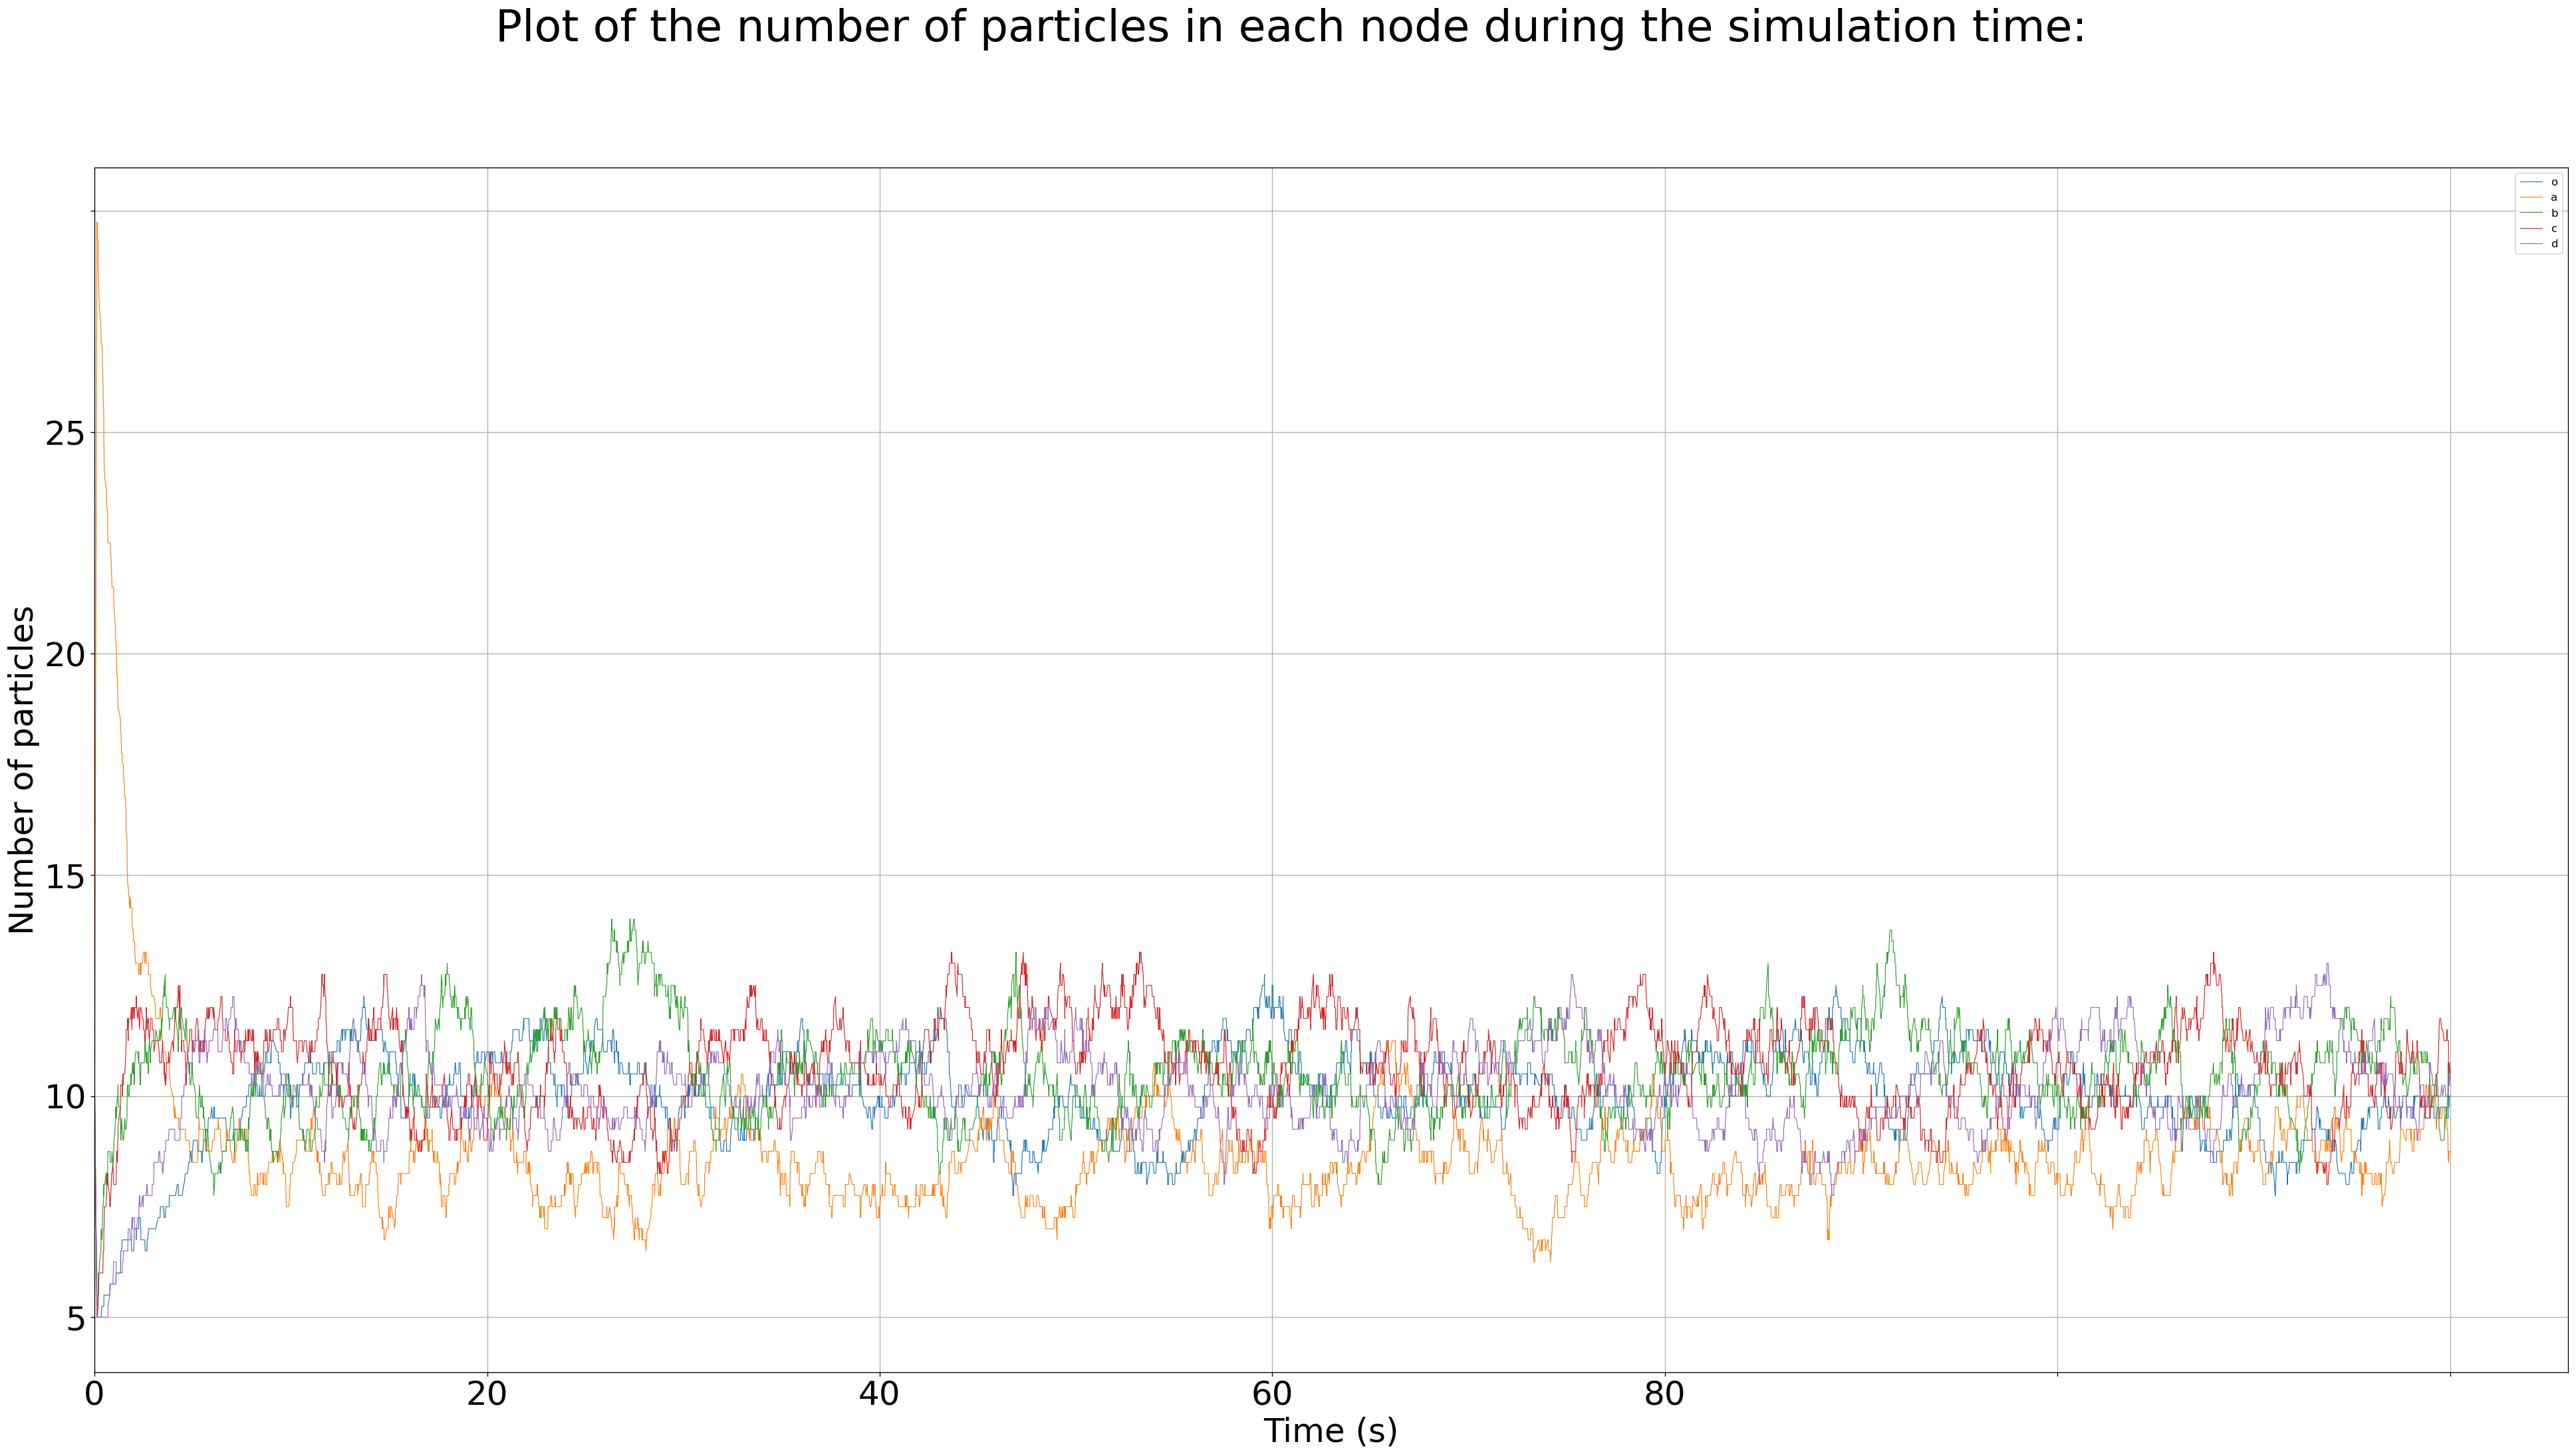

In [10]:
fig,ax = plt.subplots(figsize=(40,20),dpi=120)

tot_nop = np.array(tot_nop)
for col, node in zip(range(len(tot_nop)), nodes):
    ax.plot(tot_times, tot_nop[:,col], label= node, linewidth=0.7)
ax.legend()
ax.grid()
ax.set_xlabel("Time (s)",fontsize= 30)
ax.set_ylabel("Number of particles", fontsize= 30)
ax.set_xlim(left=0)

ax.set_yticklabels(np.arange(0, 30, 5),fontsize= 30)
ax.set_xticklabels(np.arange(0, 99, 20),fontsize= 30)

plt.savefig('fig/graph12.png')
fig.suptitle('Plot of the number of particles in each node during the simulation time:', fontsize=40)




plt.show()

The stationary distribution of the continuous-time random walk followed by the single particles is represented by the probability distribution $\bar{\pi}(t)$.

Given a finite state space $\mathcal{X}$, $\bar{\pi}_i(t)$ represents the probability that the chain ***X(t)***  is in the state ***i*** at time ***t***, i.e.:

$$\bar{\pi}_i(t) = P(X(t) = i), \ \ \ i \in \mathcal{X}$$


In [11]:
pi_bar_distribution = {}
for idx,node in enumerate(nodes):
    pi_bar_distribution[node] = pi_bar[idx]
    
print(pi_bar_distribution)

{'o': 0.18518518518518493, 'a': 0.148148148148148, 'b': 0.22222222222222218, 'c': 0.2222222222222224, 'd': 0.2222222222222226}


We can see that the stationary distribution of the continuous-time random walk is really similar to the average number of particles in the different nodes after 60 time units